Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.



Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [313]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings



In [314]:
import pandas as pd

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder


#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

# there are various other models that have been imported in the coming sections

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics


# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics



pdata = pd.read_csv("bank-full.csv")

print('Done importing packages...')


Done importing packages...


#### 1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include 
(name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, 
 analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing 
 values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [315]:
# check datatype
pdata.info()
pdata.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [316]:

# statistical summary
pdata.describe()


age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [317]:

# shape
pdata.shape


(45211, 17)

In [318]:

# null values
print('null values')
pdata.isnull().values.any()


null values


False

In [319]:

# non-real values
print('non-real values')
pdata.applymap(np.isreal).all(1)

non-real values


0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [320]:
# statistical summary
pdata.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [321]:
### Five point summary of  attributes and label :-

df_transpose = pdata.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

min    25%    50%     75%       max
age         18.0   33.0   39.0    48.0      95.0
balance  -8019.0   72.0  448.0  1428.0  102127.0
day          1.0    8.0   16.0    21.0      31.0
duration     0.0  103.0  180.0   319.0    4918.0
campaign     1.0    1.0    2.0     3.0      63.0
pdays       -1.0   -1.0   -1.0    -1.0     871.0
previous     0.0    0.0    0.0     0.0     275.0

In [322]:
#Convert variable to a categorical variable wherever relevant
pdata['day'] = pdata['day'].astype('category')
pdata['job'] = pdata['job'].astype('category')

pdata['marital'] = pdata['marital'].astype('category')
pdata['education'] = pdata['education'].astype('category')
pdata['default'] = pdata['default'].astype('category')
pdata['housing'] = pdata['housing'].astype('category')
pdata['loan'] = pdata['loan'].astype('category')
pdata['contact'] = pdata['contact'].astype('category')
pdata['month'] = pdata['month'].astype('category')
pdata['poutcome'] = pdata['poutcome'].astype('category')
pdata['Target'] = pdata['Target'].astype('category')

In [323]:
#Check top few records of the dataset
pdata.head()





# It shows that there are sixteen independent variables 
# ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, 
#  compaign, pdays, previous, poutcome) and one dependent variable (Target).
# There are many columns which are not numeric.

# # bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single')
# 4 - education (categorical: 'secondary','tertiary','primary','unknown')

# 5 - default: has credit in default? (categorical: 'no','yes')
# 6 - balance: balance in the account : numeric
# 7 - housing: has housing loan? (categorical: 'no','yes')
# 8 - loan: has personal loan? (categorical: 'no','yes')

# # related with the last contact of the current campaign:
# 9 - contact: contact communication type (categorical: 'cellular','telephone','unknown')
# 10 - day is day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')// need to convert into categorical from numeric




# 11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 12 - duration: last contact duration, in seconds (numeric).
# # other attributes:
# 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
# 15 - previous: number of contacts performed before this campaign and for this client (numeric)
# 16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success','other')

# Output variable (desired target):
# 17 - Target - has the client subscribed a term deposit? (binary: 'yes','no')
# any missing values

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact day month  duration  campaign  pdays  previous poutcome Target  
0  unknown   5   may       261         1     -1         0  unknown     no  
1  unknown   5   may       151         1     -1         0  unknown     no  
2  unknown   5   may        76         1     -1         0  unknown     no  
3  unknown   5   may        92         1     -1         0  unknown     no  
4  unknown   5   may       198         1     -1         0  unknown     no

In [324]:
for col in ['job','marital','education','default','housing','loan','contact','month','poutcome','Target']:
    print('Distribution of ', col,':', pdata[col].value_counts(normalize=True))

    
# Job has 'unknown' value
# Education  has 'unknown' value
# Contact  has 'unknown' value
# we will replace these values in the coming sections

Distribution of  job : blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
Distribution of  marital : married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
Distribution of  education : secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
Distribution of  default : no     0.981973
yes    0.018027
Name: default, dtype: float64
Distribution of  housing : yes    0.555838
no     0.444162
Name: housing, dtype: float64
Distribution of  loan : no     0.839774
yes    0.160226
Name: loan, dtype: float64
Distribution of  contact : cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, d

#### Outlier detection from Interquartile range (IQR)¶


In [325]:
Q1=pdata['age'].quantile(q=0.25)
Q3=pdata['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)


# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)


print('Number of outliers in Age upper : ', pdata[pdata['age']>70.5]['age'].count())
print('Number of outliers in Age lower : ', pdata[pdata['age']<10.5]['age'].count())
print('% of Outlier in Age upper: ',round(pdata[pdata['age']>70.5]['age'].count()*100/len(pdata)), '%')
print('% of Outlier in Age lower: ',round(pdata[pdata['age']<10.5]['age'].count()*100/len(pdata)), '%')


# % of Outlier in Age upper:  1.0 %
# % of Outlier in Age lower:  0.0 %

1st Quartile (Q1) is:  33.0
3st Quartile (Q3) is:  48.0
Lower outliers in Ages:  10.5
Upper outliers in Ages:  70.5
Number of outliers in Age upper :  487
Number of outliers in Age lower :  0
% of Outlier in Age upper:  1.0 %
% of Outlier in Age lower:  0.0 %


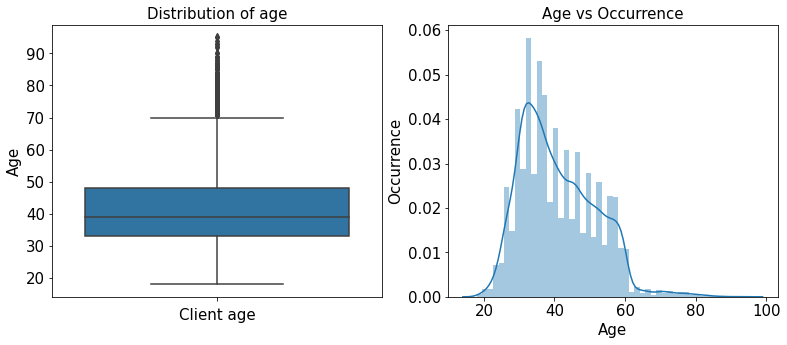

In [326]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
#boxplot
sns.boxplot(x='age',data=pdata,orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(pdata['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)





# We have clients with all the ages (minimum age 18 to maximum age 95).
# Mean and median have very less diference.
# age attribute does not have any missing values.
# age is right skewed. As more number of data points are present on right tail.


In [327]:
Q1=pdata['balance'].quantile(q=0.25)
Q3=pdata['balance'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', L_outliers)
print('Upper outliers in Balance: ', U_outliers)

print('Number of outliers in Balance upper : ', pdata[pdata['balance']>643]['balance'].count())
print('Number of outliers in Balance lower : ', pdata[pdata['balance']<-221]['balance'].count())
print('% of Outlier in Balance upper: ',round(pdata[pdata['balance']>643]['balance'].count()*100/len(pdata)), '%')
print('% of Outlier in Balance lower: ',round(pdata[pdata['balance']<-221]['balance'].count()*100/len(pdata)), '%')


# % of Outlier in Balance upper:  42.0 %
# % of Outlier in Balance lower:  4.0 %

1st Quartile (Q1) is:  72.0
3st Quartile (Q3) is:  1428.0
Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0
Number of outliers in Balance upper :  18980
Number of outliers in Balance lower :  1922
% of Outlier in Balance upper:  42.0 %
% of Outlier in Balance lower:  4.0 %


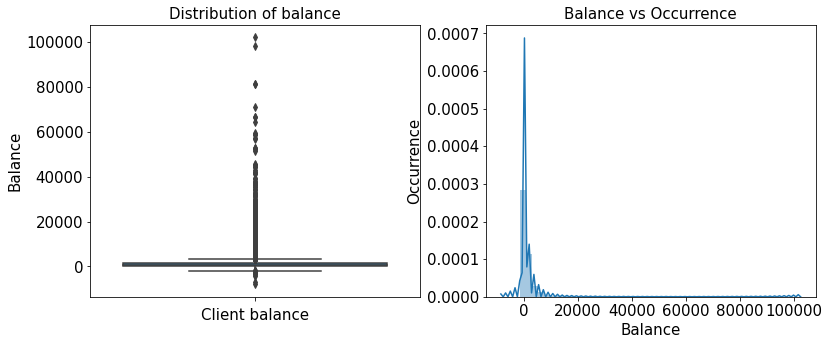

In [328]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=pdata,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(pdata['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)



# Balance is right skewed. As more number of data points are present on right tail. 
# Balance attribute does not have any missing values.



In [330]:
Q1=pdata['duration'].quantile(q=0.25)
Q3=pdata['duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

print('Number of outliers in Duration upper : ', pdata[pdata['duration']>643]['duration'].count())
print('Number of outliers in Balance lower : ', pdata[pdata['duration']<-221]['duration'].count())
print('% of Outlier in Duration upper: ',round(pdata[pdata['duration']>643]['duration'].count()*100/len(pdata)), '%')
print('% of Outlier in Duration lower: ',round(pdata[pdata['duration']<-221]['duration'].count()*100/len(pdata)), '%')


# % of Outlier in Duration upper:  7.0 %
# % of Outlier in Duration lower:  0.0 %

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  319.0
Lower outliers in Duration:  -221.0
Upper outliers in Duration:  643.0
Number of outliers in Duration upper :  3235
Number of outliers in Balance lower :  0
% of Outlier in Duration upper:  7.0 %
% of Outlier in Duration lower:  0.0 %


In [331]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=pdata,orient='v',ax=ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration in seconds', fontsize=15)
ax1.set_title('Distribution of call duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(pdata['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)


# Duration is right skewed. As more number of data points are present on right tail. 
# Duration attribute does not have any missing values.

In [332]:

fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(pdata['job'],data=pdata)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)




# Job attribute shows the clients job information.
# It also shows that there are some unknown values. 
# We do not know about the jobs of some clients. It indicates the missing values.

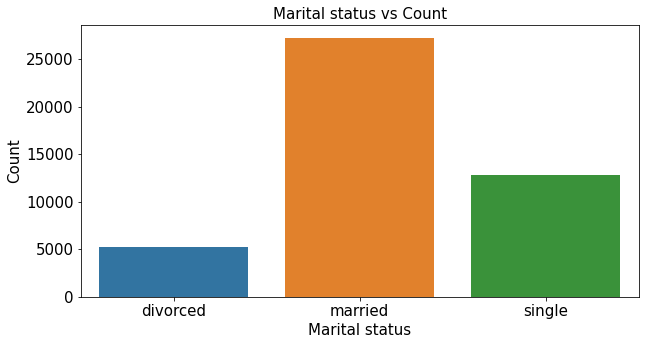

In [333]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['marital'],data=pdata)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status vs Count', fontsize=15)
ax.tick_params(labelsize=15)



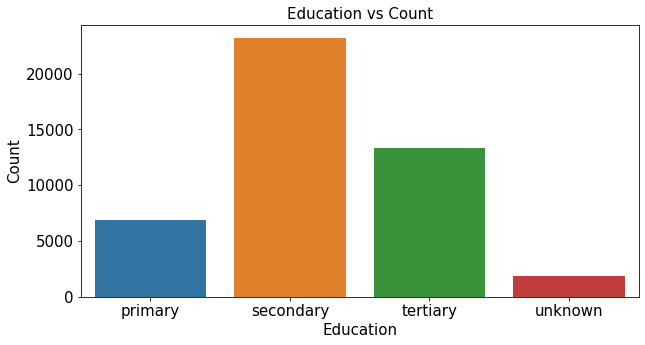

In [334]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['education'],data=pdata)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# we have some missing data, "unknown" here

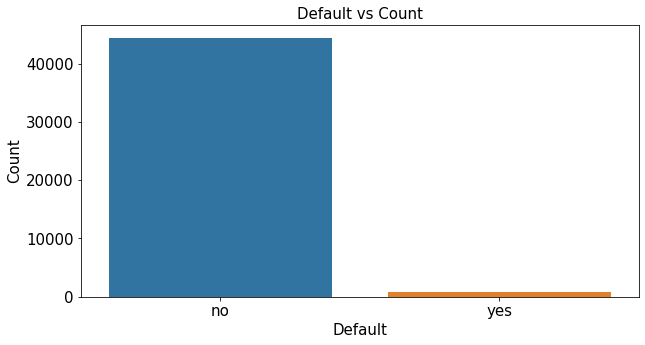

In [335]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['default'],data=pdata)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default vs Count', fontsize=15)
ax.tick_params(labelsize=15)




In [336]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['housing'],data=pdata)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)



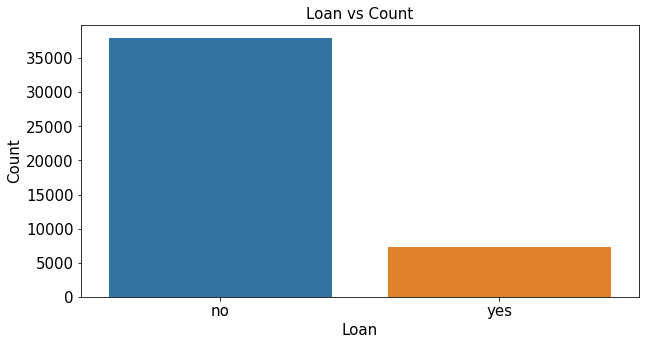

In [337]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['loan'],data=pdata)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)



In [338]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['contact'],data=pdata)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact vs Count', fontsize=15)
ax.tick_params(labelsize=15)

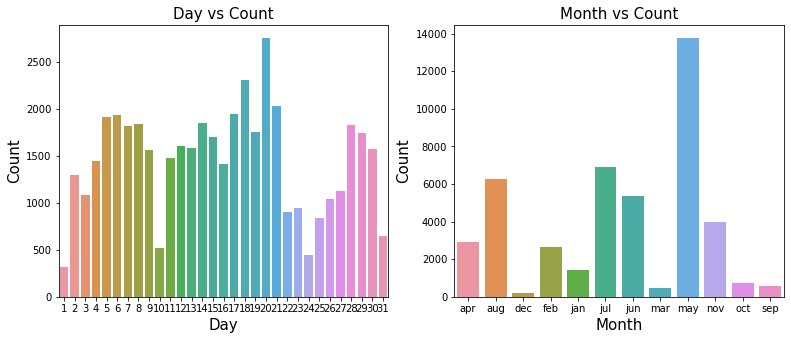

In [339]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#countplot
sns.countplot(pdata['day'],data=pdata,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)

#distplot
sns.countplot(pdata['month'],data=pdata,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

In [340]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['poutcome'],data=pdata)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome vs Count', fontsize=15)
ax.tick_params(labelsize=15)


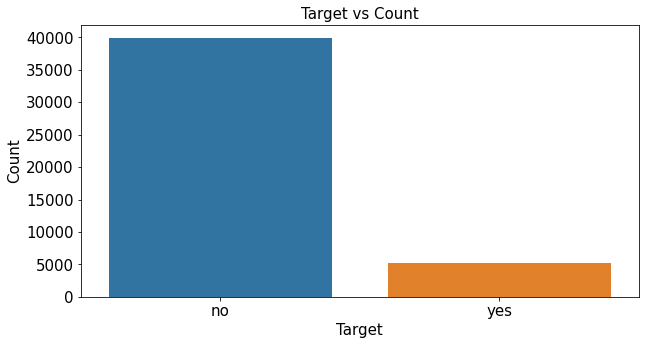

In [341]:

fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(pdata['Target'],data=pdata)
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# we have more customers who are NOT subscribing to term deposit
# so our challenge is to rightly pick up those who subscribes

#### Strategies to address the different data challenges such as data pollution, outlier’s treatment and  missing values treatment.

In [342]:


# There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, 
# which are just like missing values.
# Thus, these ambiguous values are removed from the dataset.

# Job has 'unknown' value
# Education  has 'unknown' value
# Contact  has 'unknown' value


# Step 1: Delete the rows which column 'poutcome' contains 'other', as 'other' doesn't add any value here
condition = pdata.poutcome == 'other'
dataset2 = pdata.drop(pdata[condition].index, axis = 0, inplace = False)

# Step 2: Replace 'unknown' in job & education with 'other', for contact 'unknown' will be replace with the max. frequency
# value that is "cellular"
pdata['job'].replace({'unknown':'other'}, inplace = True)

pdata['education'].replace({'unknown':'other'}, inplace = True)
pdata['contact'].replace({'unknown':'cellular'}, inplace = True)

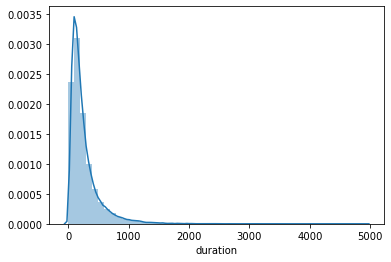

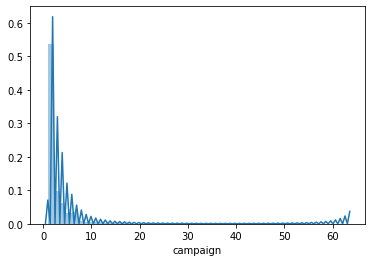

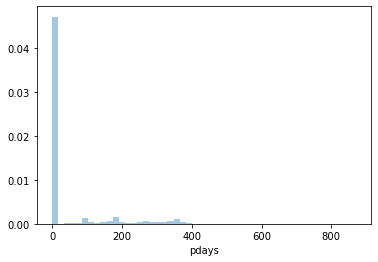

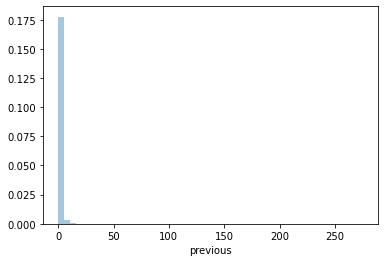

In [343]:
# summary of the plots above
for col in ['age','balance','duration','campaign','pdays','previous']:
    sns.distplot(pdata[col])
    plt.show()
    
# Age is somewhat right-tailed
# All of the continuos variables are highly right-tailed

#### 2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

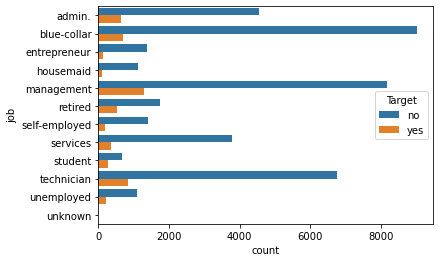

In [344]:
sns.countplot(y="job", hue="Target", data=pdata)

# management job is subscribing the most, followed by technician, blue-collar and admin

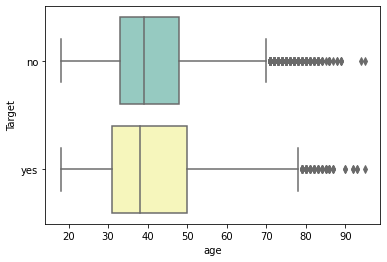

In [345]:
sns.boxplot(x="age", y="Target", data=pdata, palette="Set3")

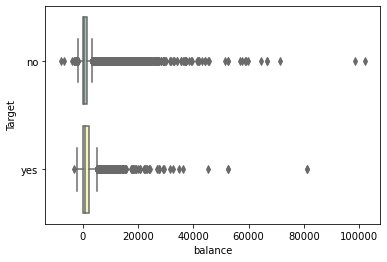

In [346]:
sns.boxplot(x="balance", y="Target", data=pdata, palette="Set3")

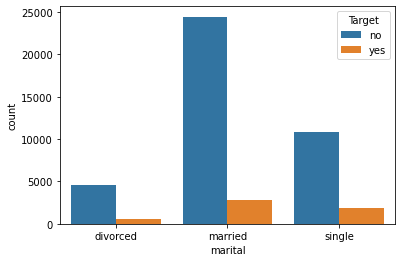

In [347]:
sns.countplot(x="marital", hue="Target", data=pdata)

# married people are subscribing the most and divorced the least

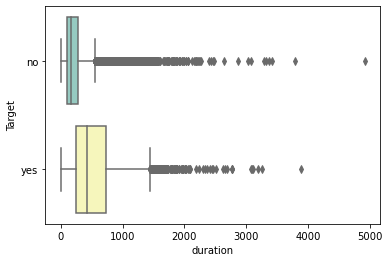

In [348]:
sns.boxplot(x="duration", y="Target", data=pdata, palette="Set3")

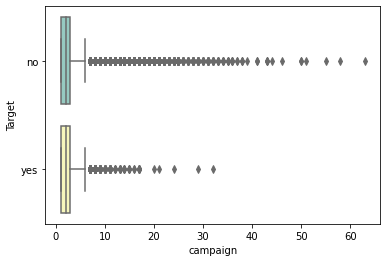

In [349]:
sns.boxplot(x="campaign", y="Target", data=pdata, palette="Set3")

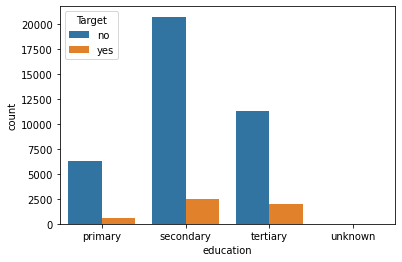

In [350]:
sns.countplot(x="education", hue="Target", data=pdata)

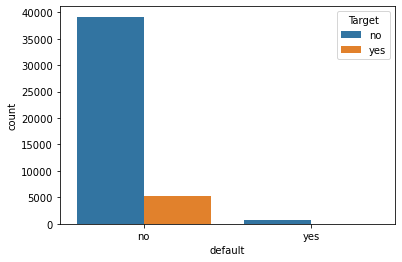

In [351]:
sns.countplot(x="default", hue="Target", data=pdata)

# people with NO credit are subscribing 

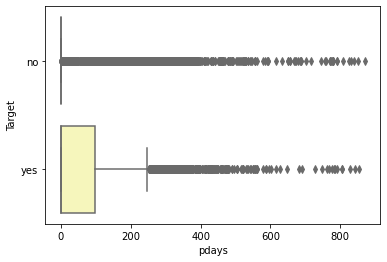

In [352]:
sns.boxplot(x="pdays", y="Target", data=pdata, palette="Set3")

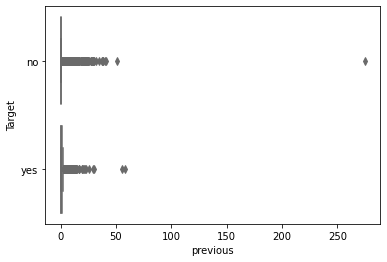

In [353]:
sns.boxplot(x="previous", y="Target", data=pdata, palette="Set3")

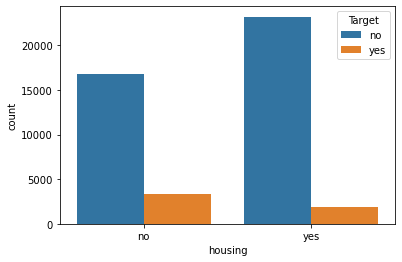

In [354]:
sns.countplot(x="housing", hue="Target", data=pdata)

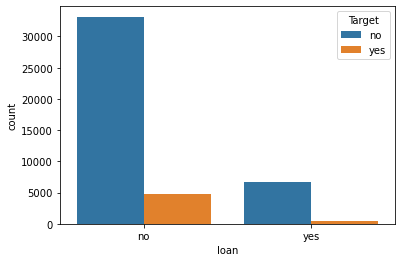

In [355]:
sns.countplot(x="loan", hue="Target", data=pdata)

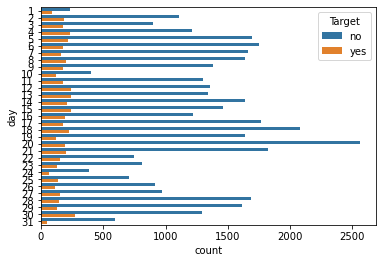

In [356]:
sns.countplot(y="day", hue="Target", data=pdata)

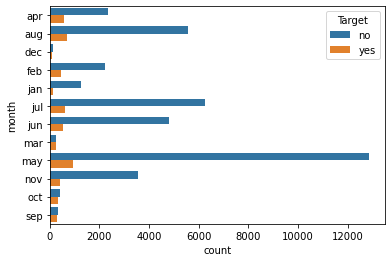

In [357]:
sns.countplot(y="month", hue="Target", data=pdata)

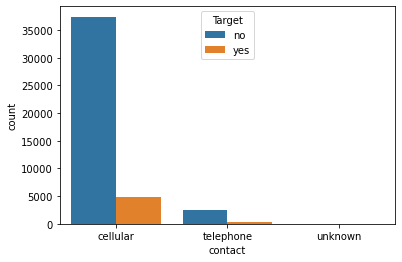

In [358]:
sns.countplot(x="contact", hue="Target", data=pdata)

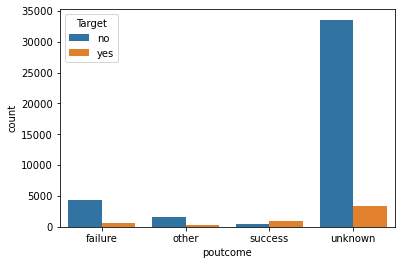

In [359]:
sns.countplot(x="poutcome", hue="Target", data=pdata)

In [360]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()
pdata['job']=labelencoder_X.fit_transform(pdata['job'])
pdata['marital']=labelencoder_X.fit_transform(pdata['marital'])
pdata['education']=labelencoder_X.fit_transform(pdata['education'])
pdata['default']=labelencoder_X.fit_transform(pdata['default'])
pdata['housing']=labelencoder_X.fit_transform(pdata['housing'])
pdata['loan']=labelencoder_X.fit_transform(pdata['loan'])
pdata['contact']= labelencoder_X.fit_transform(pdata['contact']) 
pdata['month']= labelencoder_X.fit_transform(pdata['month']) 
pdata['poutcome'] = labelencoder_X.fit_transform(pdata['poutcome'])
pdata['Target'] = labelencoder_X.fit_transform(pdata['Target'])

pdata.describe().T

count         mean          std     min    25%    50%     75%  \
age        45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
job        45211.0     4.696025     3.662424     0.0    1.0    4.0     8.0   
marital    45211.0     1.167725     0.608230     0.0    1.0    1.0     2.0   
education  45211.0     2.060516     0.778704     0.0    2.0    2.0     3.0   
default    45211.0     0.018027     0.133049     0.0    0.0    0.0     0.0   
balance    45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
housing    45211.0     0.555838     0.496878     0.0    0.0    1.0     1.0   
loan       45211.0     0.160226     0.366820     0.0    0.0    0.0     0.0   
contact    45211.0     0.064276     0.245247     0.0    0.0    0.0     0.0   
month      45211.0     5.523014     3.006911     0.0    3.0    6.0     8.0   
duration   45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign   45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays      45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous   45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
poutcome   45211.0     2.559974     0.989059     0.0    3.0    3.0     3.0   
Target     45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

                max  
age            95.0  
job            11.0  
marital         2.0  
education       3.0  
default         1.0  
balance    102127.0  
housing         1.0  
loan            1.0  
contact         1.0  
month          11.0  
duration     4918.0  
campaign       63.0  
pdays         871.0  
previous      275.0  
poutcome        3.0  
Target          1.0

In [361]:
cor=pdata.corr()
cor

age       job   marital  education   default   balance  \
age        1.000000 -0.019702 -0.403240  -0.173615 -0.017879  0.097783   
job       -0.019702  1.000000  0.059687   0.131434 -0.006367  0.014372   
marital   -0.403240  0.059687  1.000000   0.095415 -0.007023  0.002122   
education -0.173615  0.131434  0.095415   1.000000 -0.009035  0.050572   
default   -0.017879 -0.006367 -0.007023  -0.009035  1.000000 -0.066745   
balance    0.097783  0.014372  0.002122   0.050572 -0.066745  1.000000   
housing   -0.185513 -0.114208 -0.016096  -0.038689 -0.006025 -0.068768   
loan      -0.015655 -0.026211 -0.046893   0.004307  0.077234 -0.084350   
contact    0.170349 -0.003784 -0.020524  -0.075152 -0.017208  0.037999   
month     -0.042357 -0.088383 -0.006991  -0.070679  0.011486  0.019777   
duration  -0.004648  0.006843  0.011852   0.002554 -0.010021  0.021560   
campaign   0.004760  0.002765 -0.008994   0.000194  0.016822 -0.014578   
pdays     -0.023758 -0.021193  0.019172   0.007092 -0.029979  0.003435   
previous   0.001288  0.000148  0.014973   0.025295 -0.018329  0.016674   
poutcome   0.007367  0.008352 -0.016850  -0.027228  0.034898 -0.020967   
Target     0.025155  0.041673  0.045588   0.051341 -0.022419  0.052838   

            housing      loan   contact     month  duration  campaign  \
age       -0.185513 -0.015655  0.170349 -0.042357 -0.004648  0.004760   
job       -0.114208 -0.026211 -0.003784 -0.088383  0.006843  0.002765   
marital   -0.016096 -0.046893 -0.020524 -0.006991  0.011852 -0.008994   
education -0.038689  0.004307 -0.075152 -0.070679  0.002554  0.000194   
default   -0.006025  0.077234 -0.017208  0.011486 -0.010021  0.016822   
balance   -0.068768 -0.084350  0.037999  0.019777  0.021560 -0.014578   
housing    1.000000  0.041323 -0.080822  0.271481  0.005075 -0.023599   
loan       0.041323  1.000000 -0.013183  0.022145 -0.012412  0.009980   
contact   -0.080822 -0.013183  1.000000 -0.004616 -0.023201  0.053895   
month      0.271481  0.022145 -0.004616  1.000000  0.006314 -0.110031   
duration   0.005075 -0.012412 -0.023201  0.006314  1.000000 -0.084570   
campaign  -0.023599  0.009980  0.053895 -0.110031 -0.084570  1.000000   
pdays      0.124178 -0.022754  0.016006  0.033065 -0.001565 -0.088628   
previous   0.037076 -0.011043  0.028097  0.022727  0.001203 -0.032855   
poutcome  -0.099971  0.015458 -0.019176 -0.033038  0.010925  0.101588   
Target    -0.139173 -0.068185  0.014042 -0.024471  0.394521 -0.073172   

              pdays  previous  poutcome    Target  
age       -0.023758  0.001288  0.007367  0.025155  
job       -0.021193  0.000148  0.008352  0.041673  
marital    0.019172  0.014973 -0.016850  0.045588  
education  0.007092  0.025295 -0.027228  0.051341  
default   -0.029979 -0.018329  0.034898 -0.022419  
balance    0.003435  0.016674 -0.020967  0.052838  
housing    0.124178  0.037076 -0.099971 -0.139173  
loan      -0.022754 -0.011043  0.015458 -0.068185  
contact    0.016006  0.028097 -0.019176  0.014042  
month      0.033065  0.022727 -0.033038 -0.024471  
duration  -0.001565  0.001203  0.010925  0.394521  
campaign  -0.088628 -0.032855  0.101588 -0.073172  
pdays      1.000000  0.454820 -0.858362  0.103621  
previous   0.454820  1.000000 -0.489752  0.093236  
poutcome  -0.858362 -0.489752  1.000000 -0.077840  
Target     0.103621  0.093236 -0.077840  1.000000

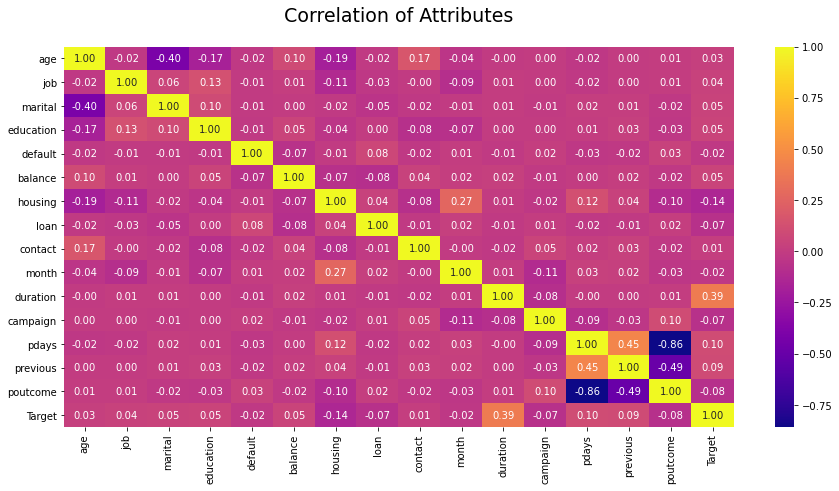

In [362]:


plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(pdata.corr(), cmap='plasma',annot=True, fmt='.2f')


# There is some correlation between duration with the Target attribute.
# pdays, previous, education, job, balance,marital and age are little correlated with Target.

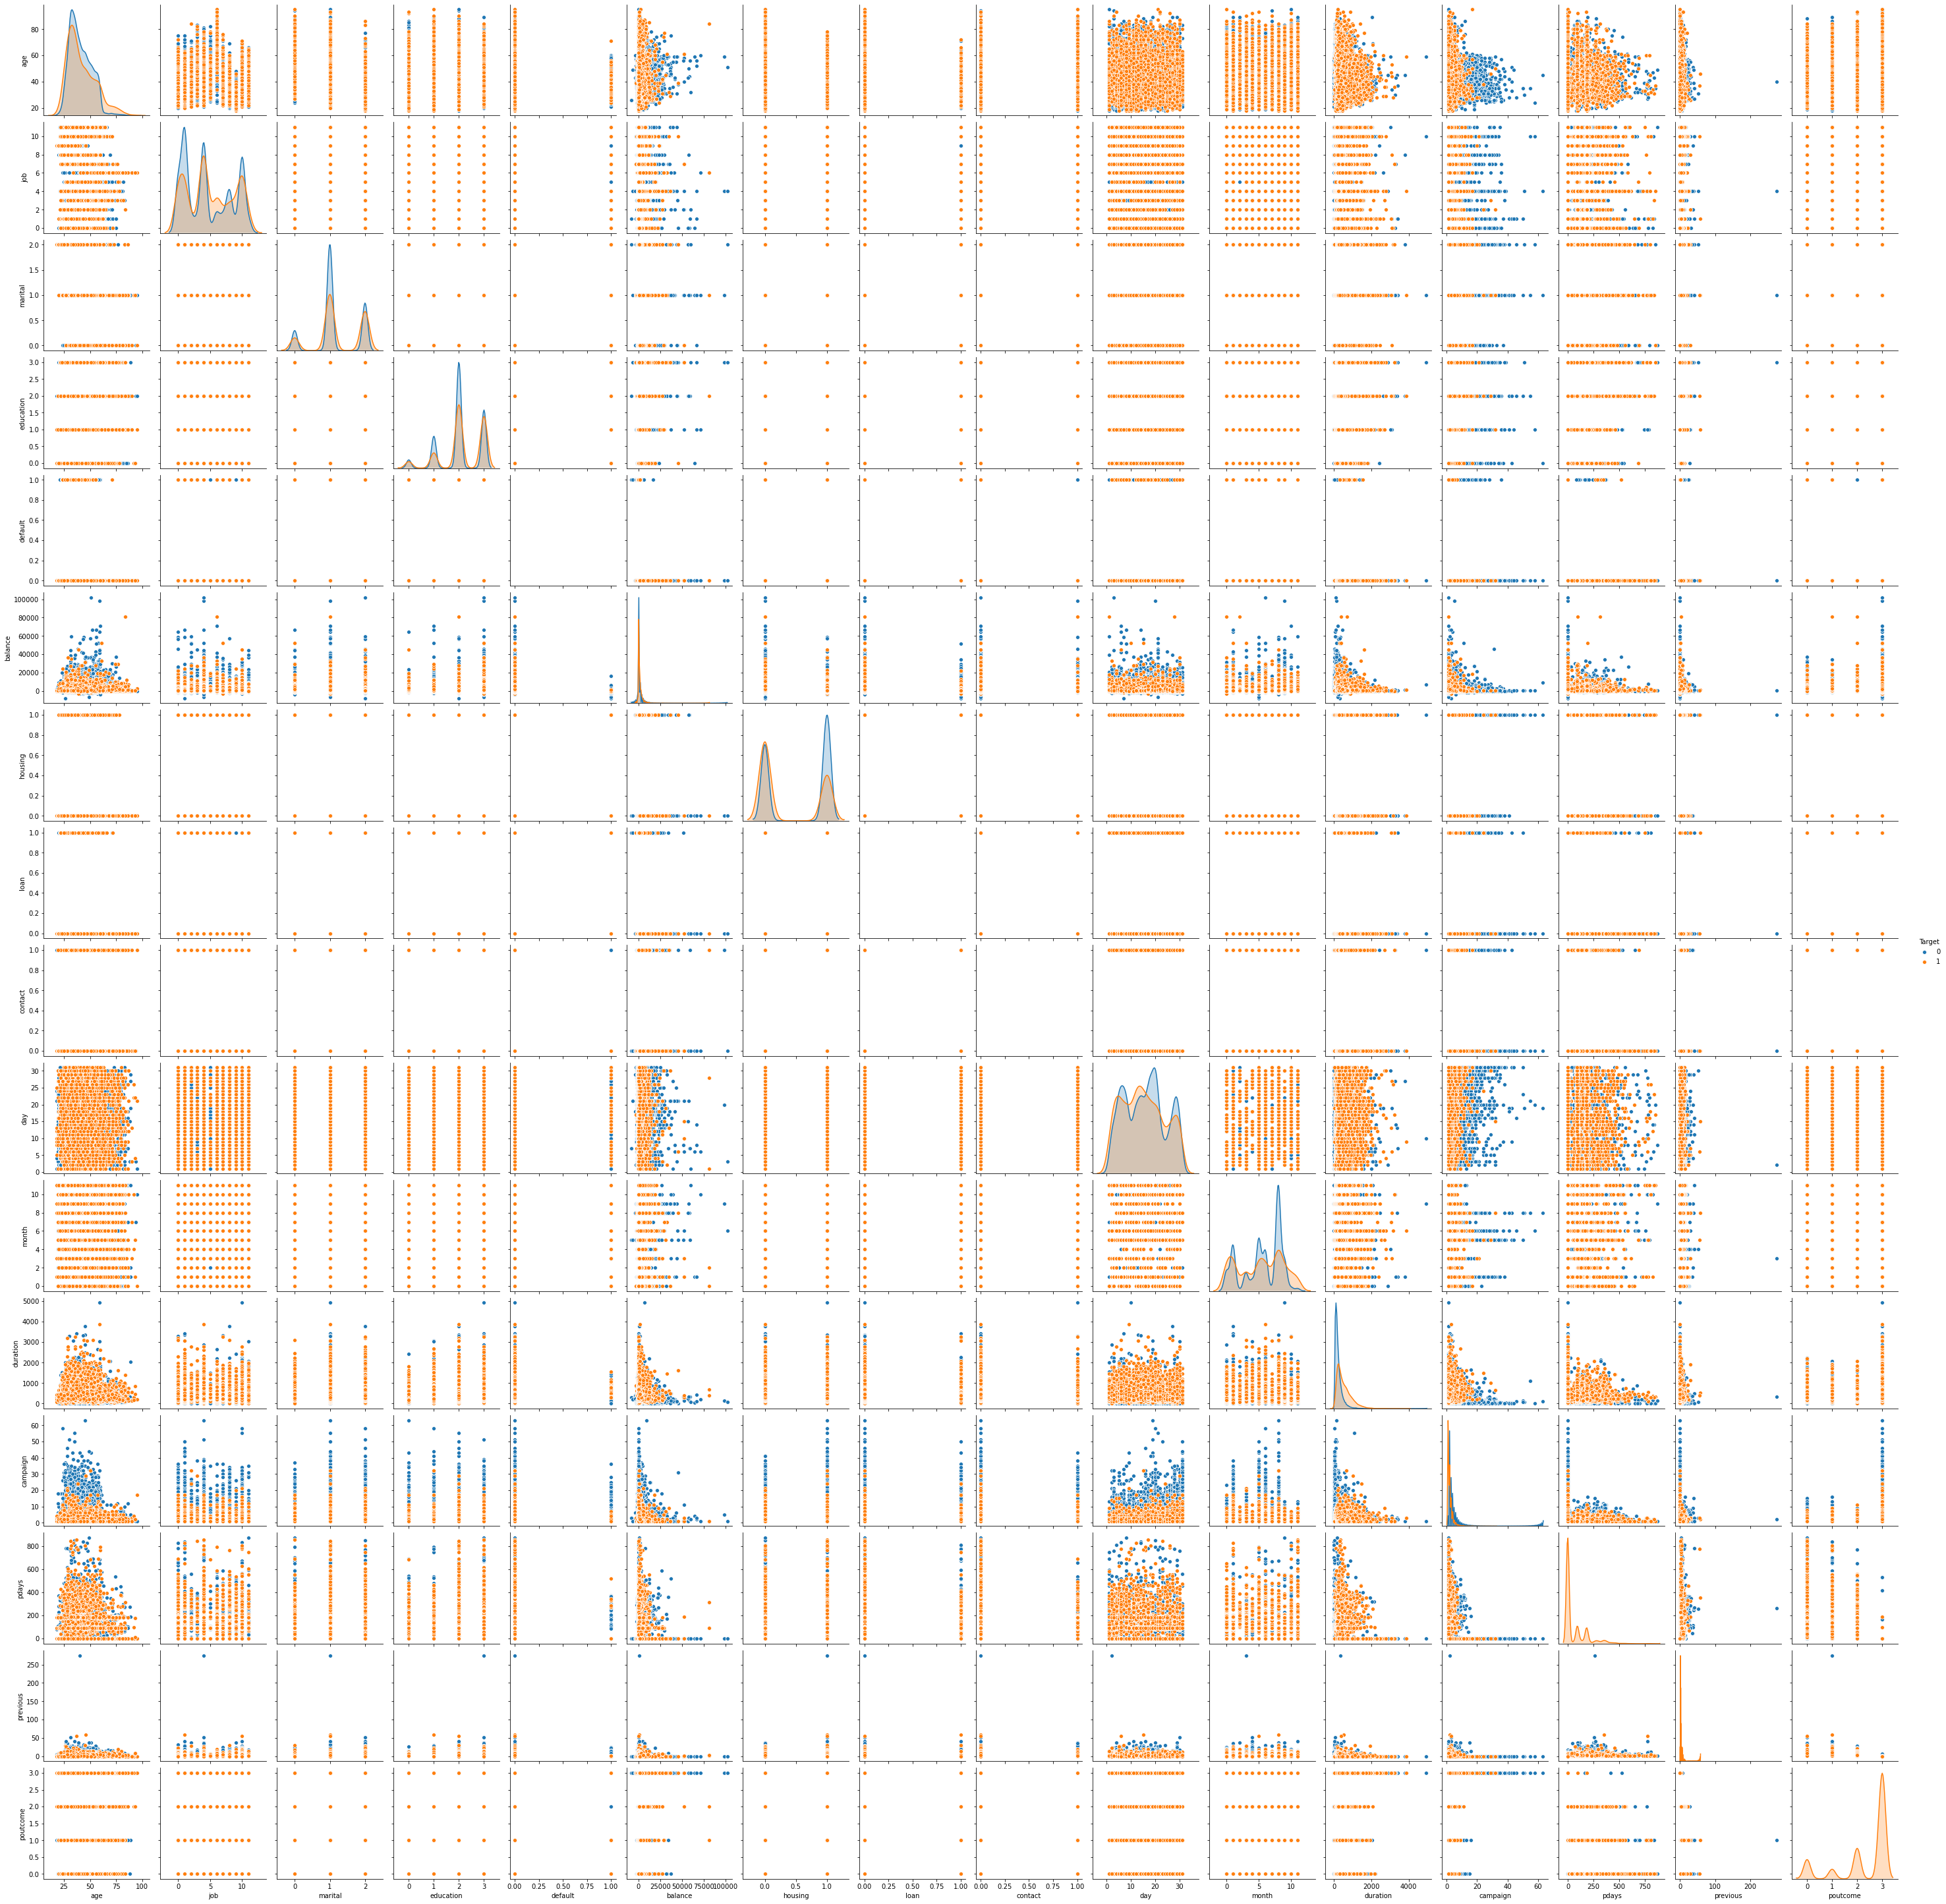

In [363]:
sns.pairplot(pdata,hue='Target')



#### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [364]:


# In the above sections , attributes were changed into category and have been label encoded
# independent and dependent variables
X=pdata.loc[:,pdata.columns!='Target']
y=pdata.loc[:,pdata.columns=='Target']

# Split X and y into training and test set in 70:30 ratio
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns



#for normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)


0.8883810085520495


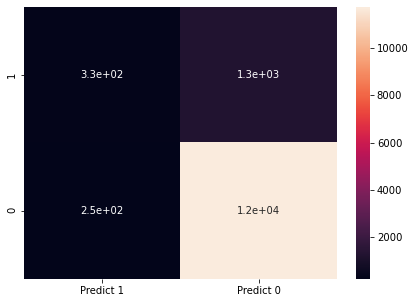

[[  328  1267]
 [  247 11722]]


In [365]:
# LogisticRegression


from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)

# [[  347  1248]
#  [  267 11702]]

# The confusion matrix
#
# True Positives (TP): 347
# True Negatives (TN): 11702
# False Positives (FP): 261
# False Negatives (FN): 1248

In [366]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))



#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Logistic Regression'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.8915221032009353

Testing accuracy 0.8883810085520495

F1 score: 0.3023041474654378
Recall: 0.20564263322884013
Precision: 0.5704347826086956
Roc Auc Score: 0.5925029942817273


Method  Training accuracy  Testing accuracy  F1 score  \
0  Logistic Regression           0.891522          0.888381  0.302304   

     Recall  Precision  Roc Auc Score  
0  0.205643   0.570435       0.592503

0.8686228251253317


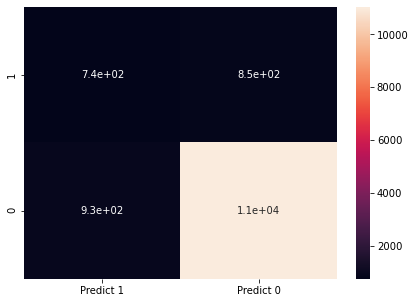

[[  745   850]
 [  932 11037]]


In [367]:
# DecisionTreeClassifier

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

# Fit the model on train
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  758   837]
#  [  938 11031]]

# The confusion matrix
#
# True Positives (TP): 758
# True Negatives (TN): 11031
# False Positives (FP): 938
# False Negatives (FN): 837


In [368]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


### There is a overfitting in the model as the dataset is performing 100% 
# accurately in training data. However, the accuracy of the testing data drops.
# so we will try to prune the trees

#Store the accuracy results for each model in a dataframe for final comparison

resultsnew = pd.DataFrame({'Method':['DecisionTree Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 1.0

Testing accuracy 0.8686228251253317

F1 score: 0.4553789731051345
Recall: 0.4670846394984326
Precision: 0.4442456768038163
Roc Auc Score: 0.6946084071416467


Method  Training accuracy  Testing accuracy  F1 score  \
0      Logistic Regression           0.891522          0.888381  0.302304   
0  DecisionTree Classifier           1.000000          0.868623  0.455379   

     Recall  Precision  Roc Auc Score  
0  0.205643   0.570435       0.592503  
0  0.467085   0.444246       0.694608

0.8911825420230021


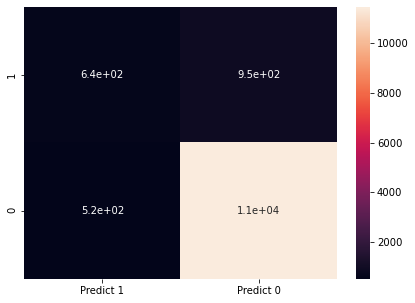

[[  644   951]
 [  525 11444]]


In [369]:
# Pruned DecisionTreeClassifier

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

# Fit the model on train
model = DecisionTreeClassifier( max_depth = 10,random_state=100,min_samples_leaf=5)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  706   889]
#  [  528 11441]]

# The confusion matrix
#
# True Positives (TP): 706
# True Negatives (TN): 11441
# False Positives (FP): 528 
# False Negatives (FN): 889


In [370]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison

resultsnew = pd.DataFrame({'Method':['Pruned DecisionTree Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.9251429835371441

Testing accuracy 0.8911825420230021

F1 score: 0.46599131693198265
Recall: 0.40376175548589344
Precision: 0.5508982035928144
Roc Auc Score: 0.6799492209629318


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949

#### Bagging: Random Forest Classifier, Bagging
#### Boosting: AdaBoosting, GradientBoost, XGBoost


0.902241226776762


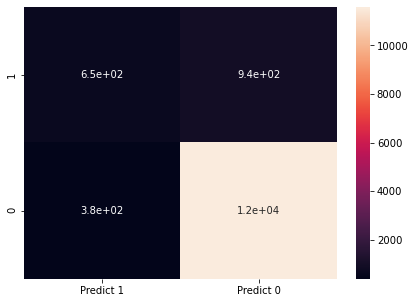

[[  653   942]
 [  384 11585]]


In [371]:
# RandomForestClassifier

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

# Fit the model on train
model = RandomForestClassifier()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  677   918]
#  [  407 11562]]

# The confusion matrix
#
# True Positives (TP): 677
# True Negatives (TN): 11562
# False Positives (FP): 407 
# False Negatives (FN): 918

In [372]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison

resultsnew = pd.DataFrame({'Method':['RandomForest Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

### There is a overfitting in the model as the dataset is performing 100% 
# accurately in training data. However, the accuracy of the testing data drops.
# so we will try to tune the forest by restricting no. of estimators

Training accuracy 0.9999368028565109

Testing accuracy 0.902241226776762

F1 score: 0.49620060790273557
Recall: 0.40940438871473356
Precision: 0.6297010607521697
Roc Auc Score: 0.6886607539696986


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661

0.9012090828664111


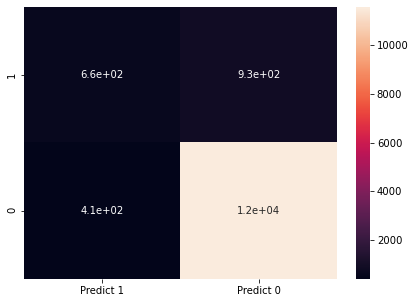

[[  665   930]
 [  410 11559]]


In [373]:
# Tuned RandomForestClassifier

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

# Fit the model on train
model = RandomForestClassifier(n_estimators = 50,random_state=100)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  678   917]
#  [  403 11566]]

# The confusion matrix
#
# True Positives (TP): 678
# True Negatives (TN): 11566
# False Positives (FP): 403 
# False Negatives (FN): 917

In [374]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

#Store the accuracy results for each model in a dataframe for final comparison

resultsnew = pd.DataFrame({'Method':['Tuned RandomForest Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.9996840142825544

Testing accuracy 0.9012090828664111

F1 score: 0.49812734082397003
Recall: 0.4169278996865204
Precision: 0.6186046511627907
Roc Auc Score: 0.691336370262677


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   
0   Tuned RandomForest Classifier           0.999684          0.901209   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661  
0  0.498127  0.416928   0.618605       0.691336

0.9012090828664111


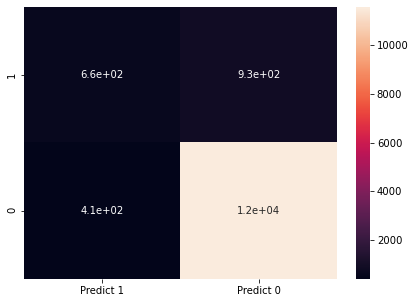

[[  665   930]
 [  410 11559]]


In [375]:
# BaggingClassifier
# we will restrict the bo. of estimators as without giving it may lead to overfitting

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier

# Fit the model on train
model = RandomForestClassifier(n_estimators=50,random_state=100)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  682   913]
#  [  411 11558]]

# The confusion matrix
#
# True Positives (TP): 682
# True Negatives (TN): 11558
# False Positives (FP): 411 
# False Negatives (FN): 913

In [376]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

resultsnew = pd.DataFrame({'Method':['Bagging Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.9996840142825544

Testing accuracy 0.9012090828664111

F1 score: 0.49812734082397003
Recall: 0.4169278996865204
Precision: 0.6186046511627907
Roc Auc Score: 0.691336370262677


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   
0   Tuned RandomForest Classifier           0.999684          0.901209   
0              Bagging Classifier           0.999684          0.901209   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661  
0  0.498127  0.416928   0.618605       0.691336  
0  0.498127  0.416928   0.618605       0.691336

0.8936154526688292


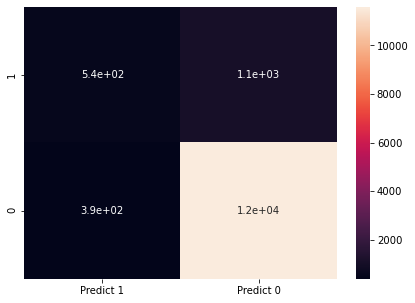

[[  544  1051]
 [  392 11577]]


In [377]:
# AdaBoosting

from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier

# Fit the model on train
model = AdaBoostClassifier(n_estimators=50,random_state=100)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  529  1066]
#  [  383 11586]]

# The confusion matrix
#
# True Positives (TP): 529  
# True Negatives (TN): 11586
# False Positives (FP): 383  
# False Negatives (FN): 1066

In [378]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

resultsnew = pd.DataFrame({'Method':['AdaBoosting Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results



Training accuracy 0.8977786204063576

Testing accuracy 0.8936154526688292

F1 score: 0.42986961675227187
Recall: 0.34106583072100316
Precision: 0.5811965811965812
Roc Auc Score: 0.6541572782980903


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   
0   Tuned RandomForest Classifier           0.999684          0.901209   
0              Bagging Classifier           0.999684          0.901209   
0          AdaBoosting Classifier           0.897779          0.893615   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661  
0  0.498127  0.416928   0.618605       0.691336  
0  0.498127  0.416928   0.618605       0.691336  
0  0.429870  0.341066   0.581197       0.654157

0.8995134178708346


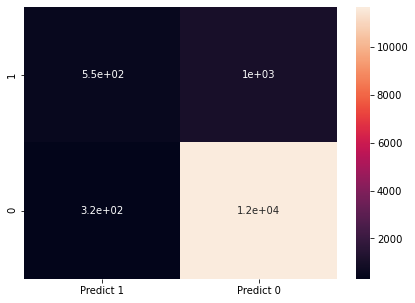

[[  551  1044]
 [  319 11650]]


In [379]:
# GradientBoostingClassifier

from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier

# Fit the model on train
model = GradientBoostingClassifier(n_estimators=50,random_state=100)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  626   969]
#  [  366 11603]]

# The confusion matrix
#
# True Positives (TP): 626     
# True Negatives (TN): 11603
# False Positives (FP): 366   
# False Negatives (FN): 969

In [380]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

resultsnew = pd.DataFrame({'Method':['GradientBoosting Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.9049830947641166

Testing accuracy 0.8995134178708346

F1 score: 0.4470588235294118
Recall: 0.34545454545454546
Precision: 0.6333333333333333
Roc Auc Score: 0.6594011803218921


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   
0   Tuned RandomForest Classifier           0.999684          0.901209   
0              Bagging Classifier           0.999684          0.901209   
0          AdaBoosting Classifier           0.897779          0.893615   
0     GradientBoosting Classifier           0.904983          0.899513   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661  
0  0.498127  0.416928   0.618605       0.691336  
0  0.498127  0.416928   0.618605       0.691336  
0  0.429870  0.341066   0.581197       0.654157  
0  0.447059  0.345455   0.633333       0.659401

In [138]:
! pip install xgboost

0.902241226776762


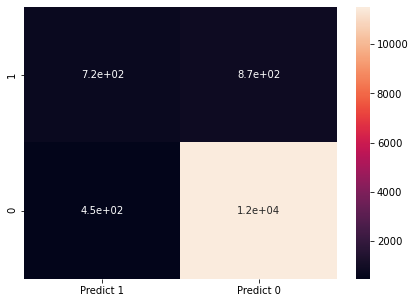

[[  722   873]
 [  453 11516]]


In [381]:
# XGBoost

from sklearn import metrics

import xgboost as xgb

# Fit the model on train
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)



model_score = model.score(x_test, y_test)
print(model_score)


cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(cm)


# [[  752   843]
#  [  480 11489]]

# The confusion matrix
#
# True Positives (TP): 752        
# True Negatives (TN): 11489
# False Positives (FP): 480    
# False Negatives (FN): 843

In [382]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,roc_auc_score

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print ('F1 score:', f1_score(y_test, y_predict))
print ('Recall:', recall_score(y_test, y_predict))
print ('Precision:', precision_score(y_test, y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

resultsnew = pd.DataFrame({'Method':['XGBoost Classifier'], 'Training accuracy': model.score(x_train,y_train),
                        'Testing accuracy': model.score(x_test, y_test),
                       'F1 score': f1_score(y_test, y_predict),'Recall': recall_score(y_test, y_predict),
                       'Precision': precision_score(y_test, y_predict), 'Roc Auc Score': roc_auc_score(y_test,y_predict)})
results = pd.concat([results, resultsnew])
results = results[['Method', 'Training accuracy','Testing accuracy','F1 score','Recall','Precision','Roc Auc Score']]
results

Training accuracy 0.9585110752993965

Testing accuracy 0.902241226776762

F1 score: 0.5212996389891696
Recall: 0.4526645768025078
Precision: 0.614468085106383
Roc Auc Score: 0.7074084016939267


Method  Training accuracy  Testing accuracy  \
0             Logistic Regression           0.891522          0.888381   
0         DecisionTree Classifier           1.000000          0.868623   
0  Pruned DecisionTree Classifier           0.925143          0.891183   
0         RandomForest Classifier           0.999937          0.902241   
0   Tuned RandomForest Classifier           0.999684          0.901209   
0              Bagging Classifier           0.999684          0.901209   
0          AdaBoosting Classifier           0.897779          0.893615   
0     GradientBoosting Classifier           0.904983          0.899513   
0              XGBoost Classifier           0.958511          0.902241   

   F1 score    Recall  Precision  Roc Auc Score  
0  0.302304  0.205643   0.570435       0.592503  
0  0.455379  0.467085   0.444246       0.694608  
0  0.465991  0.403762   0.550898       0.679949  
0  0.496201  0.409404   0.629701       0.688661  
0  0.498127  0.416928   0.618605       0.691336  
0  0.498127  0.416928   0.618605       0.691336  
0  0.429870  0.341066   0.581197       0.654157  
0  0.447059  0.345455   0.633333       0.659401  
0  0.521300  0.452665   0.614468       0.707408

#### Give conclusion regarding the best algorithm and your reason behind it.


#### We are getting the highest accuracy using Random Forest , Bagging Classifier and XGBoost.
#### Taking into consideration everything together i.e. Recall, Precision, F1 Score as well as ROC AUC score XGBoost gives the best result. 

### Hence, I will go with XGBoost in this case as it takes care of everything and not only the accuracy.

### It means that the models will predict 90% correctly the customers who will subscribe term deposit and who will not.

